In [1]:
from everything import *
from scipy.stats import spearmanr

sys.path.append('..')
from wembedder.model import Model

In [2]:
wordsim = read_csv('../wembedder/data/wordsim353_wikidata.csv', index_col=0)

In [3]:
wordsim.head()

,word1,word2,human,q1,q2,label1,label2
0,love,sex,6.77,Q316,Q5873,love,sexual intercourse
1,tiger,cat,7.35,Q19939,Q146,tiger,cat
2,tiger,tiger,10.00,Q19939,Q19939,tiger,tiger
3,book,paper,7.46,Q571,Q11472,book,paper
4,computer,keyboard,7.62,Q68,Q1921606,computer,keyboard


In [4]:
model = Model.load()

In [5]:
# Number of words in vocabulary
len([q for q in set(wordsim.q1).union(wordsim.q2) if q in model])

278

In [6]:
# Example similarity
model.similarity('Q19939', 'Q146')

0.82798253952951129

In [7]:
similarities = []
for n, (word1, word2, human, q1, q2, *rest) in wordsim.iterrows():
    try:
        similarity = model.similarity(q1, q2)
    except:
        similarity = nan
    similarities.append(similarity)

In [8]:
wordsim['similarity'] = similarities

In [9]:
wordsim.head()

,word1,word2,human,q1,q2,label1,label2,similarity
0,love,sex,6.77,Q316,Q5873,love,sexual intercourse,0.904173
1,tiger,cat,7.35,Q19939,Q146,tiger,cat,0.827983
2,tiger,tiger,10.00,Q19939,Q19939,tiger,tiger,1.000000
3,book,paper,7.46,Q571,Q11472,book,paper,0.544965
4,computer,keyboard,7.62,Q68,Q1921606,computer,keyboard,0.709703


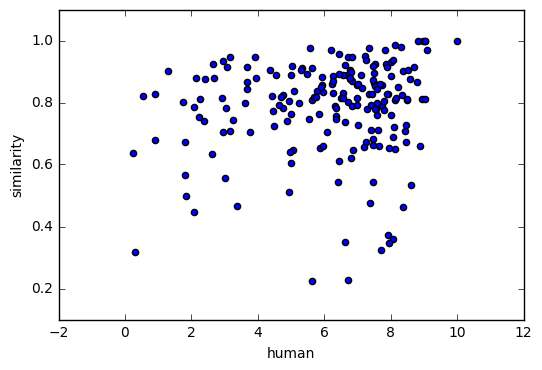

In [10]:
wordsim.plot('human', 'similarity', kind='scatter')
show()

In [11]:
X = wordsim.dropna(how='any')[['human', 'similarity']]

In [12]:
corrcoef(X.T)

array([[ 1.        ,  0.13435105],
       [ 0.13435105,  1.        ]])

In [13]:
spearmanr(X.human, X.similarity)

SpearmanrResult(correlation=0.13462514197041839, pvalue=0.062642053818111526)